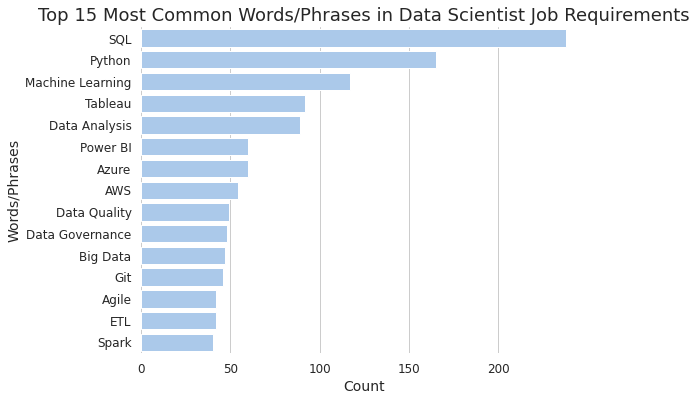

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
# load the data
url = 'https://github.com/dadashvespek/LinkedinAusScraped/raw/main/jobs%20-%20Copy.csv'
jobs_df = pd.read_csv(url)

# I gathered a list of possible words, without taking this route we would
# just be getting "of","it" and other very common words
top_words = [
    'Python', 'SQL', 'Machine Learning', 'Data Analysis', 'Statistical Analysis', 'Data Visualization',
    'Big Data', 'Data Mining', 'Natural Language Processing', 'Deep Learning', 'Neural Networks', 'Artificial Intelligence',
    'Computer Vision', 'AWS', 'Azure', 'GCP', 'Hadoop', 'Spark', 'ETL',' R ', 'Data Warehousing',
    'Java', 'Tableau', 'Power BI', 'MATLAB', 'Pandas', 'Numpy', 'Scikit-learn', 'TensorFlow', 'Keras',
    'Regression', 'Classification', 'Clustering', 'Random Forest', 'XGBoost', 'Support Vector Machines',
    'Decision Trees', 'Bayesian', 'Time Series', 'Optimization', 'Quantitative Analysis', 'Qualitative Analysis',
    'Data Wrangling', 'Data Preprocessing', 'Data Cleaning', 'Data Transformation', 'Data Integration',
    'Data Governance', 'Data Architecture', 'Data Modeling', 'Data Quality', 'Data Security',
    'Database Management', 'Data Warehouse Design', 'ETL Framework', 'Cloud Computing', 'Infrastructure',
    'System Administration', 'Linux', 'Networking', 'Docker', 'Kubernetes', 'DevOps',
    'Software Development', 'Agile', 'Git', 'JIRA', 'CI/CD', 'Object-Oriented Programming',
    'Web Development', 'HTML', 'CSS', 'JavaScript', 'React', 'Node.js', 'Django', 'Flask', 'RESTful APIs',
    'Project Management', 'Leadership', 'Collaboration', 'Critical Thinking',
    'Problem Solving', 'Decision Making', 'Business Acumen', 'Industry Knowledge','Rust','Microsoft Access'
]

# here we count the occurrences of each word in the requirements column
word_counts = {}
for word in top_words:
    count = jobs_df['Requirements'].str.count(word, re.IGNORECASE).sum()
    if count > 0:
        word_counts[word] = count
word_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count'])
word_df = word_df.sort_values(by='count', ascending=False).head(15)

# and then creating a horizontal bar plot using seaborn
sns.set(style='whitegrid')
sns.set_color_codes('pastel')
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='count', y=word_df.index, data=word_df, color='b')
ax.set_xlabel('Count', fontsize=14)
ax.set_ylabel('Words/Phrases', fontsize=14)
ax.set_title('Top 15 Most Common Words/Phrases in Data Scientist Job Requirements', fontsize=18)
ax.tick_params(labelsize=12)
sns.despine(left=True, bottom=True)
plt.show()